# 6. 학습 관련 기술들

이번 장에서는 신경망 학습의 핵심 개념들을 만나본다.

이번 장에서 다룰 것들은 가중치 매개변수의 최적값을 탐색하는 최적화 방법, 가중치 매개변수 초깃값, 하이퍼퍼러미터 설정 방법 등이다.

오버피팅의 대응책인 가중치 감소와 드롭아웃 등의 정규화도 알아본다.

이번 장의 목표는 **신경망(딥러닝) 학습의 효율과 정확도를 높이는 것**이다.

## 매개변수 갱신

신경망 학습의 목적은 손실 함수의 값을 가능한 한 낮추는 매개변수를 찾는 것이다.

이는 곧 매개변수의 최적값을 찾는 문제이며, 이러한 문제를 푸는 것을 **"최적화"** 라고 한다.

우리는 지금까지 최적의 매개변수 값을 찾는 단서로 **매개변수의 기울기(미분)을 이용**했다. 매개변수의 기울기를 구해, 기울어진 방향으로 매개변수 값을 갱신해 점점 최적의 값에 다가갔다.

이것이 **확률적 경사 하강법** 이란 단순한 방법으로, 매개변수 공간을 무작정 찾는 것보다 똑똑한 방법이다.

하지만 문제에 따라서는 SGD(확률적 경사 하강법)보다 더 똑똑한 방법도 있다. 여기에서는 SGD의 단점을 알아본 후, 다른 최적화 기법을 소개하려고 한다.

### 모험가 이야기

최적화를 해야 하는 상황을 모험가 이야기에 비유해보겠다.

<font color = grey> *색다른 모험가가 있습니다. 광활한 메마른 산맥을 여행하면서 날마다 깊은 골짜기를 찾아 발걸음을 욺깁니다. 그는 전설에 나오는 세상에서 가장 깊고 낮은 골짜기, '깊은 곳'을 찾아가려 합니다. 그것이 그의 여행 목적이죠. 게다가 그는 엄격한 제약 2개로 자신을 옭아맸습니다. 하나는 지도를 보지 않을 것, 또 하나는 눈가리개를 쓰는 것입니다. 지도도 없고 보이지도 않으니 가장 낮은 골짜기가 광대한 땅 어디에 있는지 알 도리가 없죠. 그런 혹독한 조건에서 이 모험가는 어떻게 '깊은 곳'을 찾을 수 있을까요? 어떻게 걸음을 욺겨야 효율적으로 '깊은 곳'을 찾아낼 수 있을까요?* </font>

최적 매개변수를 탐색하는 것도 이와 다르지 않다. 광대하고 복잡한 지형을 지도도 없이 눈을 가린 채로 깊은 곳을 찾지 않으면 안 되는 것이다.

이 어려운 상황에서 중요한 단서가 되는 것이 땅의 '기울기'이다. 모험가는 주위 경치는 볼 수 없지만 지금 서 있는 땅의 기울기는 알 수 있다. 그래서 지금 서 있는 장소에서 **가장 크게 기울어진 방향으로 가자는 것**이 SGD의 전략이다.

### 확률적 경사 하강법(SGD)

먼저 SGD를 복습해보자. SGD는 수식으로는 다음과 같이 쓸 수 있다.

$$W \leftarrow W - \eta\frac{\partial L}{\partial W}$$

여기에서 $W$은 갱신할 가중치 매개변수고, $\frac {\partial L}{\partial W}$은 $W$에 대한 손실 함수의 기울기이다.

$\eta$는 학습률을 의미하는데, 실제로는 미리 정해서 사용한다. 또, $\leftarrow$는 우변의 값으로 좌변의 값을 갱신한다.

이 식에서 보듯, SGD는 **기울어진 방향으로 일정 거리만 가겠다는 단순한 방법**이다. 그렇다면 이 SGD를 파이썬으로 구현해보자.

In [1]:
class SGD:
    def __init__(self, lr = 0.01):
        self.lr = lr
    def update(self, params, grads):
        for key in params.keys():
            params[key] -= self.lr * grads[key]

    초기화 때 받는 인수인 lr은 learning rate(학습률)을 의미한다. 이 학습률을 인스턴스 변수로 유지한다.
    
    update(params, grads) 메서드는 SGD 과정에서 반복해서 불린다.
    
    인수인 params와 grads은 딕셔너리 변수이다. params['W1'], grads['W1'] 등과 같이 각각 가중치 매개변수와 기울기를 저장하고 있습니다.
    
    이 코드는 다음과 같이 활용할 수 있다.
    
    ---
    
    network = TwoLayerNet(...)
    optimizer = SGD()
    
    for i in range(iters_num):
    ...
    x_batch, t_batch = get_mini_batch(...)
    grads = network.gradient(x_batch, t_batch)
    params = network.params
    optimizer.update(params, grads)
    ---
    
    optimizer는 '최적화를 행하는 자'라는 뜻의 단어이다.
    
    이 코드에서는 SGD가 그 역할을 한다.
    
    매개변수 갱신은 optimizer가 책임지고 수행하니, 우리는 optimizer에 매개변수와 기울기 정보만 넘겨주면 된다.
    
위와 같이 최적화를 담당하는 클래스를 분리해 구현하면 기능을 모듈화하기 좋다.

    다른 기법 역시 update(params, grads)라는 공통의 메서드를 갖도록 구현한다.
    
    optimizer = SGD()을 optimizer = Momentum()으로만 변경하면 SGD가 모멘텀으로 바뀌는 것이다.

<font color = blue> *NOTE. 대부분의 딥러닝 프레임워크는 다양한 최적화 기법을 구현해 제공하고, 원하는 기법으로 쉽게 바꿀 수 있는 구조로 되어 있다. 예를 들어 Lasagne이라는 딥레닝 레임워크는 다양한 최적화 기법을 구현해 updates.py 파일에 함수로 정리해두었다. 사용자는 그 중 쓰고 싶은 기법을 선택할 수 있다.* </font>

### SGD의 단점

SGD는 단순하고 구현도 쉽지만, 문제에 따라서는 비효율적일 때가 있다.

문제점을 알아보고자, 다음 함수의 최솟값을 한 번 생각해보자.

$$f(x,y) = \frac{1}{20} x^2 + y^2$$

이 함수는 왼쪽과 같이 밥그릇을 $x$축 방향으로 늘인 듯한 모습이고, 실제로 그 등고선은 $x$축 방향으로 늘인 타원으로 되어 있다.

<font color = blue> [193페이지 그림 6-1, 6-2 참고] </font>

함수의 기울기를 그려보면 [그림 6-2]처럼 되는데, 이 기울기는 **y축 방향은 크고 x축 방향은 작다는 것이 특징** 이다.

말하자면, $y$축 방향은 가파른데, $x$축 방향은 완만한 것이다.

또, 여기에서 주의할 점으로는 최솟값이 되는 장소는 $(x,y) = (0,0)$이지만, [그림 6-2]가 보여주는 **기울기 대부분은 $(0,0)$을 향하지 않는다는 것** 이다.

그렇다면 이 함수에 SGD를 적용해보자. 탐색을 시작하는 장소는 $(x,y) = (-7.0, 2.0)$으로 하자.

In [11]:
import numpy as np

def numerical_gradient(f, x):
    h = 1e-4 #0.0001
    grad = np.zeros_like(x) # x와 형상이 같지만 원소가 모두 0인 배열을 생성한다.
    
    for idx in range(x.size):
        tmp_val = x[idx] # x의 idx번째 인자를 가진 tmp_val
    
    # f(x+h) 계산
        x[idx] = tmp_val + h # tmp_val에 미세한 값(h)을 더해서 x에 집어넣는다.
        fxh1 = f(x) # 이 집어넣은 x을 함수에 대입하여 f(x+h)의 값인 fxh1을 얻는다.
    
    # f(x-h) 계산
        x[idx] = tmp_val - h # tmp_val에 미세한 값(h)을 빼서 x에 집어넣는다.
        fxh2 = f(x) # 이 집어넣은 x을 함수에 대입하여 f(x-h)의 값인 fxh2를 얻는다.
    
        grad[idx] = (fxh1 - fxh2) / (2*h) # 빈 벡터인 grad에 미분의 정의를 활용하여 미분 값을 넣는다.
        x[idx] = tmp_val # 값 복원 -> 다시 루프가 돌 수 있도록 만들어준다.
    
    return grad

def gradient_descent(f, init_x, lr = 0.01, step_num = 100):
    x = init_x
    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x -= lr * grad
    return x

def fun_test(var):
    return 1/20 * var[0]**2 + var[1] ** 2

var = np.array([-7.0, 2.0])

class record:
    def __init__(self, f, init_x, lr):
        self.f = f
        self.init_x = init_x
        self.lr = lr
        
    def record(self, step_num):
        x_list = []
        for i in range(step_num):
            value = gradient_descent(self.f, self.init_x, self.lr, i)
            x_list.append(value)
        return x_list

rec = record(fun_test, var, lr = 0.01)
x = rec.record(100)
print(x)

[array([-4.94612125e-02,  2.34187669e-17]), array([-4.94612125e-02,  2.34187669e-17]), array([-4.94612125e-02,  2.34187669e-17]), array([-4.94612125e-02,  2.34187669e-17]), array([-4.94612125e-02,  2.34187669e-17]), array([-4.94612125e-02,  2.34187669e-17]), array([-4.94612125e-02,  2.34187669e-17]), array([-4.94612125e-02,  2.34187669e-17]), array([-4.94612125e-02,  2.34187669e-17]), array([-4.94612125e-02,  2.34187669e-17]), array([-4.94612125e-02,  2.34187669e-17]), array([-4.94612125e-02,  2.34187669e-17]), array([-4.94612125e-02,  2.34187669e-17]), array([-4.94612125e-02,  2.34187669e-17]), array([-4.94612125e-02,  2.34187669e-17]), array([-4.94612125e-02,  2.34187669e-17]), array([-4.94612125e-02,  2.34187669e-17]), array([-4.94612125e-02,  2.34187669e-17]), array([-4.94612125e-02,  2.34187669e-17]), array([-4.94612125e-02,  2.34187669e-17]), array([-4.94612125e-02,  2.34187669e-17]), array([-4.94612125e-02,  2.34187669e-17]), array([-4.94612125e-02,  2.34187669e-17]), array([-4.

위 코드는 무시..
원래 x가 왔다리갔다리하는 걸 보고 싶었음..

<font color = blue> [195페이지 그림 6-3 참고] </font>

SGD는 [그림 6-3]과 같은 심하게 굽어진 움직임을 보여준다.

SGD의 단점은 **<font color = red> 탐색 경로가 비효율적 </font>** 이라는 것이다.

이럴 때는 SGD 같이 무작정 기울여진 방향으로 탐색하는 방식보다 다른 방안을 선택해야 한다. 그래서 여기에서는 이러한 단점을 개선해주는 모멘텀, AdaGrad, Adam이라는 세 방법을 소개하고자 한다.

### 모멘텀

모멘텀은 운동량을 뜻하는 단어로, 수식으로는 다음과 같이 나타낸다.

$$ \mathrm v \leftarrow \alpha \mathrm v - \eta \frac{\partial L}{\partial W} \\ \mathrm W \leftarrow \mathrm W + \mathrm v $$

$\mathrm v$라는 새로운 변수가 등장하는데, 이는 물리에서 말하는 **속도**에 해당된다.

위의 식은 기울기 방향으로 힘을 받아 물체가 가속된다는 물리 법칙을 나타낸다.

모멘텀은  [그림 6-4]와 같이 공이 그릇의 바닥을 구르는 듯한 움직임을 보여준다.

<font color = blue> [196페이지 그림 6-4 참고] </font>

위의 식의 $\alpha \mathrm v$ 항은 물체가 아무런 힘을 받지 않을 때 서서히 하강시키는 역할을 한다.

물리에서의 지면 마찰이나 공기 저항에 해당된다. 물리에서의 지면 마찰이나 공기 저항에 해당된다.

일반적으로 $\alpha = 0.9$와 같은 값으로 설정하기 때문에, 갱신이 없어도 서서히 하강시키는 역할을 하는 것이다.

모멘텀의 구현은 다음과 같다.

In [2]:
class Momentum:
    def __init__(self, lr = 0.01, momentum = 0.9):
        self.lr = lr
        self.momentum = momentum
        self.v = None
    def update(self, params, grads):
        if self.v is None:
            self.v = {}
            for key, val in params.items():
                ## items 함수는 Key와 Value의 쌍을 튜플로 묶은 값을 dict_items 객체로 돌려준다
                ## 즉, 여기서 key는 params.keys()이고, val은 params.values()이다.
                self.v[key] = np.zeros_like(val)
                ## key의 이름을 가지고 value은 모두 0으로 채워진 array가 생성된다.
                ## v를 일단 0으로 시작한다.
            
            for key in params.keys():
                self.v[key] = self.momentum*self.v[key] - self.lr*grads[key]
                ## SGD처럼 바로 W를 갱신하는 것이 아닌 v를 갱신하고
                params[key] += self.v[key]
                ## 그 다음에 v값을 W에 넣어주어 갱신시킨다.

<코드 해석>

    인스턴스 변수 v가 물체의 속도이다. v는 초기화 때는 아무 값도 담지 않고, 대신 update()가 처음 호출될 때, 매개변수와 같은 구조의 데이터를 딕셔너리 변수로 저장한다 ... self.v[key] = np.zeros_like{val) 이 부분!
    
    나머지 부분은 식을 간단히 코드로 욺긴 것이다.

<font color = blue> [197페이지 그림 6-5 참고] </font>

그림에서 보듯이 모멘텀의 갱신 경로는 공이 그릇 바닥을 구르듯 움직인다.

SGD에 비하면 지그재그 정도가 덜한 것을 알 수 있다. 이는 **$x$축의 힘은 아주 작지만 방향은 변하지 않아서 한 방향으로 일정하게 가속하기 때문** 이다. 

<font color = purple> 식에서도 알 수 있지만, $\mathrm v, \alpha$의 존재는 기울기로의 급발진을 조절하는 브레이크의 역할을 한다. 기존 식대로 하면 그대로 기울기대로 굴러가겠지만, 앞의 $\mathrm v$을 참고하여 $\mathrm v$을 설정함으로써 기울기대로 굴러떨어지는 것을 막는 것이다. </font>

### AdaGrad

신경망 학습에서는 학습률(수식에서는 $\eta$) 값이 상당히 중요하다. 이 값이 너무 작으면 학습 시간이 너무 길어지고, 너무 크면 발산하여 학습이 제대로 이루어지지 않는다.

이 학습률을 정하는 효과적 기술로 **학습률 감소** 가 있다. 이는 **학습을 진행하면서 학습률을 점차 줄여가는 방법** 이다.

즉, **처음에는 크게 학습하다가, 조금씩 작게 학습한다는 이야기**로, 실제 신경망 학습에 자주 쓰인다.

학습률을 서서히 낮추는 가장 간단한 방법은 **매개변수 전체의 학습률 값을 일관적으로 낮추는 것** 이다. 이를 더욱 발전시킨 것이 AdaGrad이다.

AdaGrad는 **각각의 매개변수에 맞춤형 값**을 만들어준다. 즉, 개별 매개변수에 적응적으로 학습률을 조정하면서 학습을 진행한다.

$$\mathrm h \leftarrow \mathrm h + \frac{\partial L}{\partial W} \Theta \frac{\partial L}{\partial W} \\
\mathrm W \leftarrow \mathrm W - \eta \frac{1}{\sqrt{\mathrm h}} \frac{\partial L}{\partial W}$$

새로 등장하는 변수 $\mathrm h$은 기존 기울기 값을 제곱하여 계속 더해준다.

$\Theta$은 행렬의 원소별 곱셈을 의미한다.

그리고 매개변수를 갱신할 때 $\frac{1}{\sqrt{\mathrm h}}$을 곱해 학습률을 조정한다.

이는 즉, <font color = red> **매개변수 원소 중에서 많이 움직임(크게 갱신된) 원소는 학습률이 낮아진다는 뜻** </font> 이다.

다시 말해 학습률 감소가 매개변수의 원소마다 다르게 적용됨을 나타낸다.

In [3]:
class AdaGrad:
    def __init__(self, lr = 0.01):
        self.lr = lr
        self.h = None
    def update(self, params, grads):
        if self.h is None:
            self.h = {}
            for key, val in params.items():
                self.h[key] = np.zeros_like(val)
            ## 여기까지는 아까의 모멘텀의 구현과 같다.
        for key in params.key():
            self.h[key] += grads[key] * grads[key]
            ## 원소끼리의 곱!!
            params[key] -= self.lr * grads[key] / (np.sqrt(self.h[key] + 1e-7))

    마지막 줄에 1e-7이라는 작은 값을 더하는 것은 self.h[key]에 0이 담겨 있다고 해도 0으로 나누는 사태를 막아준다.


<font color = blue> [199페이지 그림 6-6 참고] </font>

이 방법은 최솟값을 향해 효율적으로 움직이는 것을 볼 수 있다.

$y$축 방향은 기울기가 커서 처음에는 크게 움직이지만, 갱신 정도도 큰 폭으로 작아지도록 조정된다. 그래서 $y$축 방향으로 갱신 강도가 빠르게 약해지고, 지그재그 움직임이 줄어든다.

### Adam

모멘텀은 공이 그릇 바닥을 구르는 듯한 움직임을 보였고, AdaGrad는 매개변수의 원소마다 적응적으로 갱신 정도를 조정했다. 이 두 기법을 융합한 것이 Adam이다.

매개변수 공간을 효율적으로 탐색하면서, 하이퍼퍼러미터의 편향 보정이 진행된다는 점에서 모멘텀과 AdaGrad의 융합 버전이다.

Adam을 사용하여 [식 6.2]의 최적화 문제를 풀어보겠따.

결과는 [그림 6-7]과 같다.

<font color = blue> [200페이지 그림 6-7 참고] </font>

그림과 같이 Adam 갱신 과정도 모멘텀과 같이그릇 바닥을 구르듯 움직이면서, 좌우 흔들림이 적다.

이는 학습의 갱신 강도를 적응적으로 조정해서 얻는 혜택이다.

### 어떤 갱신 방법을 이용할 것인가?

지금까지 매개변수의 갱신 방법 4개를 살펴보았다. 여기에서는 네 기법의 결과를 비교해보자.

In [8]:
import sys, os
os.getcwd()

'/Users/choeunsol/deep-learning-from-scratch-master/ch06'

In [11]:
os.chdir("/Users/choeunsol/deep-learning-from-scratch-master/ch06")
import optimizer_compare_naive

여기서는 AdaGrad가 제일 나은 것 같은데, 사실 정답은 없다.

지금도 많은 연구에서 SGD를 사용하고 있고, 모멘텀과 AdaGrad도 시도해볼 만할 가치가 충분하다. 여기에서는 주롤 SGD와 Adam을 사용하지만, 각자의 상황을 고려하여 여러 가지로 시도해보자.

### Mnist 데이터셋으로 본 갱신 방법 비교

===========iteration:0===========
SGD:2.410721147301995
Momentum:2.296380347140672
AdaGrad:1.9874687276966492
Adam:2.1758511536726326
===========iteration:100===========
SGD:1.5996084518755342
Momentum:0.21018132408479254
AdaGrad:0.10631276912384988
Adam:0.17427763190779888
===========iteration:200===========
SGD:1.0478789276337805
Momentum:0.4591744666469162
AdaGrad:0.21132402405693979
Adam:0.32322662814393466
===========iteration:300===========
SGD:0.5549406335866642
Momentum:0.19072304357650366
AdaGrad:0.05460917427434639
Adam:0.09679165561062437
===========iteration:400===========
SGD:0.4946705776281056
Momentum:0.2026438542505193
AdaGrad:0.06980711222208896
Adam:0.10592388866038807
===========iteration:500===========
SGD:0.45458357305405833
Momentum:0.24960140819922955
AdaGrad:0.17320728567347363
Adam:0.19967988578685517
===========iteration:600===========
SGD:0.38704172165520495
Momentum:0.18147303194955616
AdaGrad:0.09506988986184614
Adam:0.12796291705432425
===========iteration

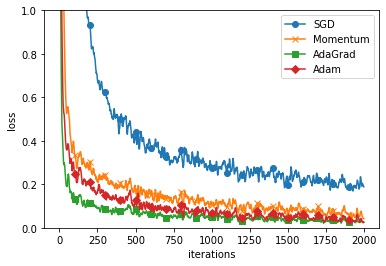

In [12]:
import optimizer_compare_mnist

MNIST에서는 SGD의 학습 진도가 가장 느리고, 세 기법의 진도는 비슷하다.

여기에서 주의할 점은 하이퍼퍼러미터인 학습률과 신경망의 구조에 따라 결과가 달라진다. 다만 일반적으로 SGD보다 다른 세 기법이 빠르게 학습하고, 때로는 최종 정확도도 높게 나타난다.

## 가중치의 초깃값

신경망 학습에서 특히 중요한 것이 가중치의 초깃값이다.

가중치의 초깃값을 무엇으로 설정하느냐가 신경망 학습의 성패를 가르는 일이 자주 있음.

여기에서는 권장 초깃값에 대해서 설명하고 실험을 통해 실제로 신경망 학습이 신속하게 이뤄지는 모습을 확인하겠다.

### 초깃값을 0으로 하면

오버피팅을 억제해 범용 성능을 높이는 **가중치 감소 기법**을 설명하고자 한다.

가중치 감소는 **가중치 매개변수의 값이 작아지도록 학습하는 방법** 이다. 가중치 값을 작게 하여 오버피팅이 일어나지 않게 하는 것.

가중치를 작게 만들고 싶으면 초깃값도 최대한 작은 값에서 시작하는 것이 정공법.

그렇다면 가중치의 초깃값을 모두 0으로 설정하면 어떨까? 이는 나쁜 아이디어이다. 그렇다면 이유가 무엇일까?

이유는 오차역전파법에서 **모든 가중치의 값이 똑같이 갱신**되기 때문이다. 예를 들어 첫 번째와 두 번째 층의 가중치가 0이라고 가정해보자. 그럼 순전파 때는 입력치의 가중치가 0이기 때문에 **두 번째 층의 뉴런에 모두 같은 값이 전달** 된다. 두 번째 층의 모든 뉴런에 같은 값이 입력된다는 것은 **역전파 때 두 번째 층의 가중치가 모두 똑같이 갱신된다는 말** 이 된다.

이는 가중치를 여러 개 같는 의미를 사라지게 한다. 이 가중치가 고르게 되어버리는 상황을 막으려면 초깃값을 무작위로 설정해야 한다.

### 은닉층의 활성화값 분포

은닉층의 활성화값(활성화 함수의 출력 데이터)의 분포를 관찰하면 중요한 정보를 얻을 수 있음.

이번 절에서는 가중치의 초깃값에 따라 은닉층 활성화값들이 어떻게 변화하는지 간단한 실험을 해보고자 한다. 구체적으로는 활성화 함수로 시그모이드 함수를 사용하는 5층 신경망에 무작위로 생성한 입력 데이터를 흘리며 각 층의 활성화값 분포를 히스토그램으로 그려보고자 한다.

In [15]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1+np.exp(-x))

x = np.random.randn(1000, 100) # 1000개의 데이터
node_num = 100 # 각 은닉층의 노드(뉴런) 수
hidden_layer_size = 5 # 은닉층은 5개
activations = {} # 이곳에 활성화 결과(활성화값)를 저장

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]
    
    w = np.random.randn(node_num, node_num) * 1 
    a = np.dot(x,w)
    z = sigmoid(a)
    activations[i] = z

    층이 5개 있으며, 각 층의 뉴런은 100개 씩.
    
    입력 데이터로서 1,000개의 데이터를 정규분포로 무작위로 생성하여 이 5층 신경망에 흘린다.
    
    활성화 함수로는 시그모이드 함수 활용, 각 층의 활성화 결과는 activations 변수에 저장.
    
    이 코드에서 가중치의 분포에 주의한다. 이번에는 표준편차가 1인 정규분포를 이용했는데, 이 분포된 정도(표준편ㄴ차)를 바꿔가며 활성화값들의 분포가 어떻게 변화하는지 관찰하는 것이 이 실험의 목적임.
    
    그럼 activations에 저장된 각 층의 활성화값 데이터를 히스토그램으로 그려보자.

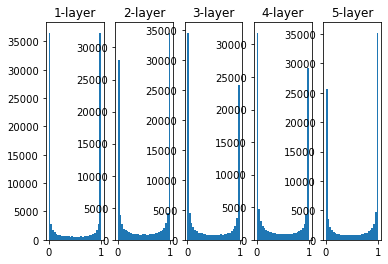

In [16]:
# 히스토그램 그리기

for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    plt.hist(a.flatten(), 30, range = (0,1))
plt.show()

각 층의 활성화값들이 0과 1에 치우쳐 분포되어 있다.

여기에서 사용한 시그모이드 함수는 그 출력이 0에 가까워지자(또는 1에 가까워지자) 그 미분은 0에 다가간다. 

<font color = purple> 시그모이드 함수의 미분을 생각해보자. 순전파의 출력값인 $y$가 1이나 0으로 갈수록 $y(1-y)$은 0으로 갈 수밖에 없다. </font>

그래서 데이터가 0과 1에 치우쳐 분포하게 되면, 역전파의 기울기 값이 점점 작아지다가 사라진다.

이것이 **기울기 소실**이라 알려진 문제이며, 층을 깊게 하는 딥러닝에서는 기울기 소실이 더 심각한 문제가 될 수 있다.

이번에는 가중치의 표준편차를 0.01로 바꾸어 같은 실험을 반복해보자.

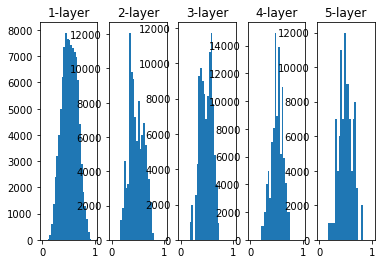

In [17]:
for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]
    
    w = np.random.randn(node_num, node_num) * 0.1
    a = np.dot(x,w)
    z = sigmoid(a)
    activations[i] = z
    
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1) 
    ## plt.subplot(nrows, ncols, index). index는 그래프가 어디에 배치될지를 표시하며, 각 subplot마다 다르게 해야 한다.
    plt.title(str(i+1) + "-layer")
    plt.hist(a.flatten(), 30, range = (0,1))
    ## 두 번째 옵션은 bins의 너비를 설정한다.
plt.show()

이번에는 0.5 부근에 집중된 것을 볼 수 있다. 0과 1로 치우치지 않아 기울기 소실 문제는 일어나지 않으나, 활성화값들이 치우쳤다는 것은 표현력 관점에서는 큰 문제가 있는 것.

즉, 이 상황에서는 **다수의 뉴런이 거의 같은 값을 출력하고 있으니 뉴런을 여러 개 둔 의미가 없어진다** 는 것이다.

예를 들어 뉴런 100개가 거의 같은 값을 출력한다면 뉴런 1개나 별반 다를 게 없다는 것이다.

그래서 활성화값들이 치우치면 **표현력을 제한**한다는 관점에서 문제가 된다.

*WARNING 각 층의 활성화값은 적당히 고루 분포되어야 한다. 층과 층 사이에 적당하게 다양한 데이터가 흐르게 해야 신경망 학습이 효율적으로 이뤄지기 때문. 반대로 치우친 데이터가 흐르면 기울기 소실이나 표현력 제한 문제에 빠져서 학습이 잘 이뤄지지 않는 경우가 생긴다.*

이어서 Xavier Glorot와 Yoshua Benhio의 논문에서 가장 권장하는 가중치 초깃값인 **Xavier 초깃값**을 써보겠다.

현재 Xavier 초깃값은 일반적인 딥러닝 프레임워크들이 표준적으로 이용하고 있다.

이 논문은 각 층의 활성화값을 광범위하게 분포시킬 목적으로 가중치의 적절한 분포를 찾고자 했따.

앞 계층의 노드가 $n$개라면 표준편차가 $\frac{1}{\sqrt {n}}$인 분포를 사용하는 결론을 이끌었다.

<font color = blue> [207페이지 그림 6-12 참고] </font>

Xavier 초깃값을 사용하면 앞 층에 노드가 많을수록 **대상 노드의 초깃값으로 설정하는 가중치가 좁게 퍼진다**.

이제 Xavier 초깃값을 써서 실험해보자. 코드에서는 가중치 초깃값 설정 부분을 다음과 같이 고쳐주기만 하면 된다.

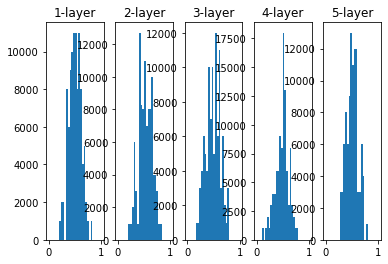

In [18]:
for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]
    
    w = np.random.randn(node_num, node_num) / np.sqrt(node_num)
    a = np.dot(x,w)
    z = sigmoid(a)
    activations[i] = z # 여기서 activations의 key를 0~4로 설정하였다.
    
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1) 
    plt.title(str(i+1) + "-layer")
    plt.hist(a.flatten(), 30, range = (0,1))
plt.show()

위 그림을 보면 층이 깊어지면서 형태가 다소 일그러지지만, 앞에서 본 방식보다는 **확실히 넓게 분포됨을 알 수 있다**.

각 층에 흐르는 데이터는 적당히 퍼져 있으므로, 시그모이드 함수의 표현력도 제한받지 않고 학습이 효율적으로 이뤄질 것으로 기대됨.

<font color = blue> *NOTE. [그림 6-13]은 오른쪽으로 갈수록 약간씩 일그러지고 있다. 이 일그러짐은 sigmoid 함수 대신 tanh 함수(쌍곡선 한수)를 이용하면 개선된다. 실제로 tanh 함수를 이용하면 말끔한 종 모양으로 분포된다. tanh 함수도 sigmoid 함수와 같은 S자 모양 곡선 함수이다. 다만 tanh 함수가 원점 $(0,0)$에서 대칭인 S 곡선인 반면, sigmoid 함수는 $(x,y) = (0,0.5)$에서 대칭인 S 곡선이다. 활성화 함수용으로는 원점에서 대칭인 함수가 바람직하다고 알려져 있음.* </font>

### ReLU를 사용할 때의 가중치 초깃값

Xavier 초깃값은 활성화 함수가 선형인 것을 전제로 이끈 결과이다.

sigmoid 함수와 tanh 함수는 좌우 대칭이라 중앙 부근이 선형인 함수로 볼 수 있다. 그래서 Xavier 초깃값이 적당한 것.

반면 ReLU를 이용할 때에는 ReLU에 특화된 초깃값을 이용하라고 권장한다. 이 특화된 초깃값을 찾아낸 Kaiming He의 이름을 따 **He 초깃값** 이라고 한다.

He 초깃값은 앞 계층의 노드가 $n$개일 때, 표준편차가 $\sqrt{\frac{2}{n}}$인 정규분포를 이용한다.

Xavier 초깃값이 $\sqrt{\frac{1}{n}}$ 이었는데, ReLU는 **음의 영역이 0이라서 더 넓게 분포시키기 위해 2배의 계수가 필요**하다고 해석할 수 있다.

<font color = blue> [209페이지 그림 6-14 참고] </font>

std = 0.01일 때의 각 층의 활성화 값은 아주 작은 값들이다. 신경망에 아주 작은 데이터가 흐른다는 것은 역전파 때 가중치의 기울기 역시 작아진다는 뜻. 실제로도 학습이 이루어지지 않을 것이다.

Xavier 초깃값 결과르 보면 이쪽은 층이 깊어지면서 치우침이 조금씩 커진다. 실제로 층이 깊어지면 활성화값들의 치우침도 커지고, 학습할 때 '기울기 소실' 문제를 일으킨다.

He 초깃값은 모든 층에서 균일하게 분포되었음. 층이 깊어져도 **분포가 균일하게 유지**되기에 역전파 때도 적절한 값이 나올 것이라고 기대할 수 있다.

이상의 실험 결과를 바탕으로,

활성화 함수로 **ReLU를 사용할 때에는 He 초깃값**을,

활성화 함수로 **Sigmoid, tanh 등 S자 모양 곡선일 때는 Xavier 초깃값**을 사용하겠다.

### MNIST 데이터셋으로 본 가중치 초깃값 비교

이번에는 실제 데이터를 바탕으로 가중치의 초깃값을 주는 방법이 신경망 학습에 얼마나 영향을 주는지 보겠다.

In [27]:
os.getcwd()

'/Users/choeunsol/deep-learning-from-scratch-master/ch06'

===========iteration:0===========
std=0.01:2.302516729044505
Xavier:2.292479665273272
He:2.421730337747573
===========iteration:100===========
std=0.01:2.302302273167294
Xavier:2.2244428764623656
He:1.5489966240302377
===========iteration:200===========
std=0.01:2.3016340839935387
Xavier:2.090092578349644
He:0.8284449401798804
===========iteration:300===========
std=0.01:2.303953372144572
Xavier:1.7515492292526904
He:0.5010234058946672
===========iteration:400===========
std=0.01:2.3001221625652377
Xavier:1.1093947448392065
He:0.3663792950317549
===========iteration:500===========
std=0.01:2.300879666131366
Xavier:0.737245618102948
He:0.36539840374336074
===========iteration:600===========
std=0.01:2.300875174378116
Xavier:0.6913361413871406
He:0.3797657536369544
===========iteration:700===========
std=0.01:2.299606700406585
Xavier:0.4058378893886191
He:0.21367925323783413
===========iteration:800===========
std=0.01:2.299119274493882
Xavier:0.4966345808991734
He:0.35357477208110966
==

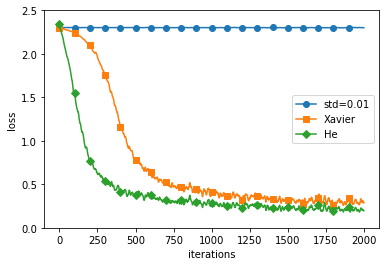

In [28]:
import weight_init_compare

이 실헝은 층별 뉴런 수가 100개인 5층 신경망에서 활성화 함수로 ReLU를 사용.

std = 0.01일 때는 학습이 전혀 이루어지지 않는다. 앞서 활성화 값의 분포에서 본 것처럼 순전파 때 너무 작은 값(0 근처로 밀집한 데이터)이 흐르기 때문

Xavier와 He 초깃값의 경우에는 학습이 순조롭게 이루어진다. 학습 진도는 He 초깃값 쪽이 더 빠르다.

위에서 살펴보았듯, 가중치의 초깃값은 신경망 학습에 아주 중요한 포인트이다.

## 배치 정규화

앞 절에서는 각 층의 활성화값 분포를 관찰해보며, 가중치의 초깃값을 적절히 설정하면 각 층의 활성화 값 분포가 적당히 퍼지면서 학습이 원활하게 수행됨을 배웠다.

그렇다면 각 층이 **활성화를 적당히 퍼뜨리도록 강제해보는 것**은 어떨까? **배치 정규화**가 그런 아이디어에서 출발한 방법이다.

### 배치 정규화 알고리즘

배치 정규화는 2015년, 즉 최근에 나온 방법인데도 많은 연구자가 뛰어난 결과를 달성했다.

배치 정규화가 주목받는 이유는 다음과 같다.

    1. 학습을 빨리 진행할 수 있다(학습 속도 개선).
    2. 초깃값에 크게 의존하지 않는다(초깃값 선택 장애여 안녕!).
    3. 오버피팅을 억제한다(드롭아웃 등의 필요성 감소).
    
딥러닝의 학습 시간이 길다는 것을 생각하면 첫 번째 이점은 상당히 반가운 일이다.

초깃값에 크게 신경 쓸 필요가 있고, 오버피팅 억제 효과가 있다는 점도 딥러닝 학습의 두통거리를 덜어준다.

배치 정규화의 기본 아이디어는 **각 층에서의 활성화값이 적당히 분포되도록 조정** 하는 것이다.

그래서 아래 그림과 같이 데이터 분포를 정규화하는 '배치 정규화 계층'을 신경망에 삽입한다.

<font color = blue> [212페이지 그림 6-16 참고] </font>

배치 정규화는 그 이름과 같이 학습 시 미니배치를 단위로 정규화한다.

구체적으로는 **데이터 분포가 평균 0, 분산이 1이 되도록 정규화** 한다.

수식은 다음과 같다.

$$\mu_{\mathrm B} \leftarrow \frac{1}{m} \sum_{i=1}^{m}{x_i} \\
\sigma_{\mathrm B}^{2} \leftarrow \frac{1}{m} \sum_{i=1}^{m} { (x_i - \mu_{\mathrm B}) ^ 2} \\
\hat x_i \leftarrow \frac {x_i - \mu_{\mathrm B}}{\sqrt{\sigma_{\mathrm B}^{2} + \epsilon}} $$

미니배치 $\mathrm B = [x_1, x_2, \dots, x_m]$ 이라는 m개의 입력 데이터의 집합에 대해 평균 $\mu_{\mathrm B}$와 분산 $\sigma_{\mathrm B}^{2}$을 구한다.

그리고 입력 데이터를 평균이 0, 분산 1이 되게 정규화한다.

식에서 $\epsilon$ 기호는 작은 값으로, 0으로 나누는 사태를 예방하는 역할이다.

따라서 위의 식은 결과적으로 $[x_1, x_2, \dots, x_m]$을 평균 0, 분산 1인 데이터 $[\hat{x_1},\hat{x_2}, \dots, \hat{x_m}]$ 으로 변환한다.

이 처리를 **활성화 함수의 앞 혹은 뒤에 삽입** 함으로써 데이터 분포가 덜 치우치게 할 수 있다.

또, 배치 정규화 계층마다 이 정규화된 데이터에 고유한 확대와 이동 변환을 수행한다. 수식으로는 다음과 같다.

$$y_i \leftarrow \gamma \hat{x_i} + \beta$$

이 식에서 &gamma;가 확대를, &beta;가 이동을 담당한다.

두 값은 처음에는 $\gamma = 1, \beta = 0$부터 시작하고, 학습하면서 적합한 값으로 조정한다.

### 배치 정규화의 효과

MNIST 데이터셋을 사용하여 배치 정규화 계층을 사용할 때와 사용하지 않을 때의 학습 진도가 어떻게 달라지는지 관찰해보자.

In [31]:
import batch_norm_test

거의 모든 경우에서 배치 정규화를 사용할 때의 학습 진도가 더 빠른 것으로 나타난다.

배치 정규화를 이용하지 않고, 초깃값이 잘 분포되어 있지 않으면 학습이 전혀 진행되지 않는 모습도 확인할 수 있다.

지금까지 살펴본 것처럼 배치 정규화를 사용하면 학습이 빨라지며, 가중치 초깃값에 크게 의존하지 않아도 된다. 배치 정규화는 이처럼 장점이 많으니 앞으로 다양한 분야에서 활약할 것임.

## 바른 학습을 위해

기계학습에는 오버피팅이 문제가 되는 일이 많다. 오버피팅이란 **신경망이 훈련 데이터에만 지나게 적응되어 그 외의 데이터에는 제대로 대응하지 못하는 상태**를 가리킨다.

기계학습은 범용 성능을 지향한다. 즉, 훈련 데이터에는 포함되지 않는 데이터가 주어져도 바르게 식별해내는 모델이 바람직하다. 복잡하고 표현력이 높은 모델을 만들 수는 있지만, 그만큼 오버피팅을 억제하는 기술이 중요해지는 것이다.

### 오버피팅

오버피팅은 주로 다음의 두 경우에 일어난다.

- 매개변수가 많고 표현력이 높은 모델 
- 훈련 데이터가 적음

이번 절에서는 이 두 요건을 충족하여 오버피팅을 일으켜보겠다.

MNIST 데이터셋의 훈련 데이터 중 300개만을 사용하고, 7층 네트워크를 사용해 네트워크의 복잡성을 높였다.

In [11]:
import os, sys
os.getcwd()

'/Users/choeunsol/deep-learning-from-scratch-master/ch06'

In [24]:
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
import numpy as np

class SGD:
    def __init__(self, lr = 0.01):
        self.lr = lr
    def update(self, params, grads):
        for key in params.keys():
            params[key] += grads[key] * self.lr

(x_train, t_train), (x_test, t_test) = load_mnist(normalize = True)
x_train = x_train[:300]
t_train = t_train[:300]
## 오버피팅을 재현하기 위해 학습 데이터의 수를 300개로 제한했다.

network = MultiLayerNet(input_size = 784, hidden_size_list = [100, 100, 100, 100, 100, 100], output_size = 10)
optimizer = SGD(lr = 0.01)

max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iters_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)
    
    if i % iters_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        
        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break

/Users/choeunsol/deep-learning-from-scratch-master/ch06/../common/multi_layer_net.py:92: RuntimeWarning: overflow encountered in square
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W ** 2)
/Users/choeunsol/deep-learning-from-scratch-master/ch06/../common/multi_layer_net.py:92: RuntimeWarning: invalid value encountered in double_scalars
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W ** 2)


In [25]:
import overfit_weight_decay

훈련 데이터와 시험 데이터에 대한 정확도가 큰 차이가 난다.

이처럼 정확도가 크게 벌어지는 것은 훈련 데이터에만 적응해버린 결과이다. 훈련 때 사용하지 않은 범용 데이터에는 제대로 대응하지 못하는 것을 확인할 수 있다.

### 가중치 감소

오버피팅 억제용으로 이용하는 방법 중 **가중치 감소** 라는 것이 있다.

이는 학습 과정에서 **큰 가중치에 대해서는 그에 상응하는 큰 패널티를 부여** 하여 오버피팅을 억제하는 방법이다. 오버피팅은 **가중치 매개변수의 값이 커서 발생하는 경우가 많기 때문** 이다.

신경망 학습의 목적은 손실 함수 값을 줄이는 것이다. 예를 들어 가중치의 제곱 노름을 손실 함수에 더한다고 하자. 그러면 가중치가 커지는 것을 억제할 수 있다.

가중치를 $\mathrm W$라고 하면, 1.2 노름에 따른 가중치 감소는 $\frac {1}{2} \lambda \mathrm W^{2}$ 이 되고, 이것을 손실 함수에 더한다.

여기서 &lambda;는 정규화의 세기를 조절하는 **하이퍼퍼러미터**이다. &lambda;를 크게 설정할수록 큰 가중치에 대한 패널티가 커진다. 앞쪽 $\frac {1}{2}$은 $\frac {1}{2} \lambda \mathrm W^{2}$의 미분 결과인 $\lambda \mathrm W$을 조정하는 역할의 상수이다.

가중치 감소는 모든 가중치 각각의 손실 함수에 $\frac {1}{2} \lambda \mathrm W^{2}$을 더한다. 따라서 가중치의 기울기를 구하는 계산에서는 그동안의 오차역전파법에 따른 결과에 정규화 항을 미분한 $\lambda \mathrm W$을 더한다.

<font color = purple> 역전파법 때는 손실 함수의 값을 미분하므로 (Softmax-With-Loss 층의 역전파법에서 이미 공부한 바 있다) $\frac {1}{2} \lambda \mathrm W^{2}$의 미분값인 $\lambda \mathrm W$을 더해준다. </font>

방금 수행한 실험에서 $\lambda = 0.1$으로 가중치 감소를 적용해보자.

In [35]:
import overfit_weight_decay

훈련 데이터와 시험 데이터에 대한 정확도에는 여전히 차이가 있지만, 가중치 감소를 이용하지 않은 방법과 비교하면 그 차이가 줄은 것을 볼 수 있다.

오버피팅이 억제되었다는 것으로, 앞서와는 달리 훈련 데이터에 대한 정확도가 $100%$에 도달하지 못한 점도 주목해야 한다.

### 드롭아웃

앞 절에서는 오버피팅을 억제하는 방식으로 손실 함수에 가중치의 1.2 노름을 더한 가중치 감소 방법을 설명하였다.

가중치 감소는 간단하게 구현할 수 있고, 어느 정도 지나친 학습을 억제할 수 있다. 하지만 **신경망 모델이 복잡**해지면 가중치 감소만으로는 대응하기 어려워진다.

드롭아웃은 뉴런을 임의로 삭제하면서 학습하는 방법이다. 훈련 때 은닉층의 뉴런을 무작위로 골라 삭제한다. 삭제한 뉴런은 신호를 전달하지 않게 된다.

훈련 때는 **데이터를 흘릴 때마다 삭제할 뉴런을 무작위로 선택**하고, 시험 때는 모든 뉴런에 신호를 전달한다. 단, 시험 때는 **각 뉴런의 출력에 훈련 때 삭제 안 한 비율을 곱하여 출력**한다.

이제는 드롭아웃을 구현해보자.

순전파를 담당하는 forward 메서드에서는 훈련 때(train_flg = True)만 잘 계산해두면 시험 때는 단순히 데이터를 흘리기만 하면 된다.

더 효율적인 구현이 궁금하면 http://chiner.org/ 의 드롭아웃 구현을 참고하자.

In [38]:
class Dropout:
    def __init__ (self, dropout_ratio = 0.5):
        self.dropout_ratio = dropout_ratio
        self.mask = None
    
    def forward(self, x, train_flg = True):
        if train_flg:
            self.mask = np.random.rand(*x.shape) > self.dropout_ratio
            ## x.shape 앞에 붙는 *은 x.shape의 position을 받는 것을 의미한다.
            ## **을 앞에 붙이면 뒤의 인자의 Key를 받는다. *와 **을 통틀어 packing이라고 한다.
            return x * self.mask
        else:
            return x * (1.0 - self.dropout_ratio)
    
    def backward(self, dout):
            return dout * self.mask

<코드 해석>

    1. 핵심은 훈련 시에는 순전파 때마다 self.mask에 삭제할 뉴런을 False로 표시한다는 것
    
    2. self.mask는 x와 형상이 같은 배열을 무작위로 생성하고, 그 값이 dropout_ratio보다 큰 원소만 True로 설정한다.
    
    3. 역전파 때의 동작은 ReLU와 같다. 순전파 때 신호를 통과시키는 뉴런은 역전파 때도 신호를 그대로 통과시키고, 순전파 때 통과시키지 않은 뉴런은 역전파 때도 신호를 차단한다.
    
그렇다면 드롭아웃의 효과를 MNIST 데이터셋으로 확인해보자.

<font color = blue> *NOTE. common/trainer.py에는 Trainer라는 클래스를 구현해두었다. 이 클래스는 지금까지 해온 것과 같은 네트워크를 대신 해준다. common/trainer.py와 ch06/overfit_dropout.py를 참고하자.* </font>

train loss:2.3162673226553916
=== epoch:1, train acc:0.08333333333333333, test acc:0.0793 ===
train loss:2.3255199530082593
train loss:2.305864349690691
train loss:2.3102532159218523
=== epoch:2, train acc:0.08333333333333333, test acc:0.0794 ===
train loss:2.319665499122551
train loss:2.31970296021694
train loss:2.3093730555778764
=== epoch:3, train acc:0.08, test acc:0.0795 ===
train loss:2.3088594567045893
train loss:2.3183818189870733
train loss:2.3136624706258924
=== epoch:4, train acc:0.08, test acc:0.0782 ===
train loss:2.310183829121967
train loss:2.324444290131151
train loss:2.31266429182514
=== epoch:5, train acc:0.07666666666666666, test acc:0.0777 ===
train loss:2.2906389703058565
train loss:2.2962498947618686
train loss:2.30864260429545
=== epoch:6, train acc:0.07666666666666666, test acc:0.078 ===
train loss:2.301412285168152
train loss:2.306432862995385
train loss:2.300729893180315
=== epoch:7, train acc:0.07333333333333333, test acc:0.0776 ===
train loss:2.3127797893640

=== epoch:58, train acc:0.35333333333333333, test acc:0.2674 ===
train loss:2.2292636328857833
train loss:2.245580065823669
train loss:2.236957338614209
=== epoch:59, train acc:0.36, test acc:0.2704 ===
train loss:2.2331341464581067
train loss:2.232355005027028
train loss:2.2474926618514184
=== epoch:60, train acc:0.36333333333333334, test acc:0.2758 ===
train loss:2.236753596270421
train loss:2.226341844490968
train loss:2.223486055758475
=== epoch:61, train acc:0.36333333333333334, test acc:0.2797 ===
train loss:2.2316296451755053
train loss:2.229669191726564
train loss:2.236464276235875
=== epoch:62, train acc:0.36333333333333334, test acc:0.283 ===
train loss:2.2358111268819325
train loss:2.2353244682113287
train loss:2.2450869234864697
=== epoch:63, train acc:0.36666666666666664, test acc:0.2829 ===
train loss:2.229967370790245
train loss:2.248667772874387
train loss:2.2234579366200213
=== epoch:64, train acc:0.35333333333333333, test acc:0.2793 ===
train loss:2.227306488758471
tr

=== epoch:114, train acc:0.4533333333333333, test acc:0.3604 ===
train loss:2.1262632684876603
train loss:2.102528607891594
train loss:2.0886282160704734
=== epoch:115, train acc:0.45666666666666667, test acc:0.3592 ===
train loss:2.135898668889699
train loss:2.1337767046285143
train loss:2.1169823992436516
=== epoch:116, train acc:0.45666666666666667, test acc:0.3622 ===
train loss:2.1521013696477276
train loss:2.1239116729214267
train loss:2.1215252824748627
=== epoch:117, train acc:0.4666666666666667, test acc:0.3643 ===
train loss:2.098428888462351
train loss:2.1243610856498485
train loss:2.1016313811198803
=== epoch:118, train acc:0.47, test acc:0.369 ===
train loss:2.104029505620163
train loss:2.096366491360296
train loss:2.1160232684121443
=== epoch:119, train acc:0.4633333333333333, test acc:0.3683 ===
train loss:2.1295687257965272
train loss:2.1169115635054037
train loss:2.1392516702597106
=== epoch:120, train acc:0.47333333333333333, test acc:0.3718 ===
train loss:2.134399076

=== epoch:170, train acc:0.5, test acc:0.3956 ===
train loss:1.821733809041777
train loss:1.766154671617818
train loss:1.7909393467773436
=== epoch:171, train acc:0.5033333333333333, test acc:0.3964 ===
train loss:1.8524325895433214
train loss:1.7999629964853967
train loss:1.85446327501636
=== epoch:172, train acc:0.49666666666666665, test acc:0.3977 ===
train loss:1.8096904872412765
train loss:1.8619678411453302
train loss:1.8678783155079828
=== epoch:173, train acc:0.49666666666666665, test acc:0.4021 ===
train loss:1.7511313740835766
train loss:1.7451479669786962
train loss:1.9095207489246204
=== epoch:174, train acc:0.49666666666666665, test acc:0.3996 ===
train loss:1.8637924664148244
train loss:1.8131883297068918
train loss:1.8211140440767377
=== epoch:175, train acc:0.49666666666666665, test acc:0.3991 ===
train loss:1.8268206864937242
train loss:1.7804087725607263
train loss:1.7772570689777023
=== epoch:176, train acc:0.5, test acc:0.4018 ===
train loss:1.8141519707346259
train

=== epoch:227, train acc:0.6, test acc:0.4791 ===
train loss:1.3546476025693996
train loss:1.4570426906178662
train loss:1.3070639511399025
=== epoch:228, train acc:0.6166666666666667, test acc:0.4819 ===
train loss:1.4050991200914953
train loss:1.4031383153488775
train loss:1.391144057668983
=== epoch:229, train acc:0.62, test acc:0.4872 ===
train loss:1.4736120490160898
train loss:1.396080087468328
train loss:1.428286658237343
=== epoch:230, train acc:0.6333333333333333, test acc:0.4987 ===
train loss:1.461050463136851
train loss:1.3248312648646106
train loss:1.3898011460939825
=== epoch:231, train acc:0.6266666666666667, test acc:0.4945 ===
train loss:1.33604518544071
train loss:1.4331203416961171
train loss:1.4786382399430673
=== epoch:232, train acc:0.6266666666666667, test acc:0.4939 ===
train loss:1.3875150603917703
train loss:1.4439328779937606
train loss:1.4475578780659137
=== epoch:233, train acc:0.6366666666666667, test acc:0.5044 ===
train loss:1.329680576100178
train loss:

=== epoch:283, train acc:0.6866666666666666, test acc:0.563 ===
train loss:1.0196458215866988
train loss:1.081016445341355
train loss:1.1131989206720023
=== epoch:284, train acc:0.6966666666666667, test acc:0.5638 ===
train loss:1.0488644620917977
train loss:1.0008997474626435
train loss:1.0545836213879987
=== epoch:285, train acc:0.68, test acc:0.5616 ===
train loss:1.0544931150854648
train loss:1.0989788773563383
train loss:1.0840501492378234
=== epoch:286, train acc:0.6866666666666666, test acc:0.5603 ===
train loss:0.9341357663342025
train loss:1.0731357751022588
train loss:1.0958177942071816
=== epoch:287, train acc:0.6866666666666666, test acc:0.5662 ===
train loss:0.9908724174502221
train loss:0.9808799609186282
train loss:1.0599829668074316
=== epoch:288, train acc:0.69, test acc:0.5657 ===
train loss:1.0168167970079875
train loss:1.0487854404041572
train loss:1.0323828859780415
=== epoch:289, train acc:0.6933333333333334, test acc:0.5702 ===
train loss:0.9167933402052282
train

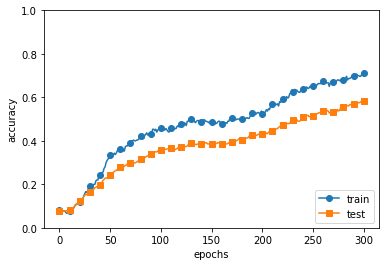

In [40]:
import overfit_dropout

드롭아웃하지 않은 것과 비교해보면 test accuracy와 train accuracy가 상당히 줄었음을 확인할 수 있다.

훈련 데이터에 대한 정확도가 100%에 도달하지도 않게 되었다. 이처럼 드롭아웃을 이용하면 표현력을 높이면서도 오버피팅을 억제할 수 있다.

<font color = blue> *NOTE. 기계학습에서는 앙상블 학습을 애용한다. 앙상블 학습은 개별적으로 학습시킨 여러 모델의 출력을 평균 내어 추론하는 방식이다. 신경망의 맥락에서 얘기하면, 가령 같은(또는 비슷한) 구조의 네트워크를 5개 준비하여 따로따로 학습시키고, 시험 때는 그 5개의 출력을 평균 내어 답하는 것이다. 앙상블 학습을 수행하면 신경망의 정확도가 몇 % 정도 개선된다는 것이 실험적으로 알려져 있다.* </font>
    
<font color = blue> *앙상블 학습은 드롭아웃과 밀접하다. 드롭아웃이 학습 때 뉴런응ㄹ 무작위로 삭제하는 행위를 매번 다른 모델을 학습시키는 것으로 해석할 수 있기 때문이다. 그리고 추론 때는 뉴런의 출력에 삭제한 비율(이를테면 0.5 등)을 곱함으로써 앙상블 학습에서 여러 모델의 평균을 내는 것과 같은 효과를 내는 것이다. 즉, 드롭아웃은 앙상블 학습과 같은 효과를 (대략) 하나의 네트워크로 구현했다고 생각할 수 있다.* </font>

## 적절한 하이퍼파라미터 값 찾기

하이퍼파라미터는, 예를 들어 각 층의 **뉴런 수, 배치 크기, 매개변수 갱신 시의 학습률과 가중치 감소** 등이다.

이러한 하이퍼파라미터의 값을 적절히 설정하지 않으면 모델의 성능이 크게 떨어지기도 한다. 하이퍼파라미터의 값은 매우 중요하지만 그 값을 결정하기까지는 일반적으로 많은 시행착오를 겪는다. 이번 절에서는 하이퍼파라미터의 값을 최대한 효율적으로 탐색하는 방법을 설명한다.

### 검증 데이터

지금까지는 데이터셋을 훈련 데이터와 시험 데이터라는 두 가지로 분리해 이용했다. 훈련 데이터로는 학습을 하고, 시험 데이터로는 범용 성능을 평가했다.

그렇게 해서 훈련 데이터에만 지나치게 적응되어 있지 않은지(오버피팅한 건 아닌지), 그리고 범용 성능은 어느 정도인지 같은 것을 평가할 수 있었다.

앞으로 하이퍼파라미터를 다양한 값으로 설정하고 검증할 것인데, 여기서 주의할 점은 하이퍼파라미터의 성능을 평가할 때는 **시험 데이터를 사용해서는 안 된다는 것**이다.

같은 성능 평가인데 하이퍼파라미터가 대상일 때는 시험 데이터를 사용해서는 안 되는 이유가 뭘까? 그것은 시험 데이터를 사용하여 하이퍼파라미터를 조정하면, **하이퍼파라미터 값이 시험 데이터에 오버피팅되기 때문** 이다. 

하이퍼파라미터의 값의 '좋음'을 시험 데이터로 확인하게 되므로 **하이퍼파라미터의 값이 시험 데이터에만 적합하도록 조정되어 버린다**. 그렇게 되면 다른 데이터에는 적용하지 못하니 범용 성능이 떨어지는 모델이 될지도 모른다.

그래서 하이퍼파라미터를 조정할 때는 하이퍼파라미터 전용 확인 데이터가 필요하다. 하이퍼파라미터 조정용 데이터를 일반적으로 **검증 데이터(validation data)** 라고 한다. 하이퍼파라미터의 적절성을 평가하는 데이터인 셈이다.

<font color = blue> *NOTE. 훈련 데이터는 매개변수(가중치와 편향)의 학습에 이용하고, 검증 데이터는 하이퍼파라미터의 성능을 평가하는 데 이용한다. 시험 데이터는 범용 성능을 확인하기 위해서 마지막에 (이상적으로는 한 번만) 이용한다. 정리하자면, 훈련 데이터는 매개변수 학습에, 검증 데이터는 하이퍼파라미터 성능 평가에, 시험 데이터는 신경망의 범용 성능을 평가하는 데 쓰인다.* </font>

데이터셋에 따라서는 훈련 데이터, 검증 데이터, 시험 데이터를 미리 분리해둔 것도 있으나, MNIST 데이터셋은 훈련 데이터와 시험 데이터로만 분리해두었다.

이런 경우에는 사용자가 직접 데이터를 분리해야 한다. 예를 들어 MNIST 데이터셋에서 검증 데이터를 얻는 가장 간단한 방법은 **훈련 데이터 중 20% 정도를 검증 데이터로 먼저 분리하는 것** 이다. 코드로는 다음과 같다.

In [47]:
from dataset.mnist import load_mnist
from common.util import shuffle_dataset
(x_train, t_train), (x_test, t_test) = load_mnist()

# 훈련 데이터를 뒤섞는다.
x_train, t_train = shuffle_dataset(x_train, t_train)
## shuffle_dataset은 데이터를 뒤섞는 함수로, np.random_shuffle을 이용했다.

# 20%를 검증 데이터로 분할
validation_rate = 0.20
validation_num = int(x_train.shape[0] * validation_rate)

x_val = x_train[:validation_num]
t_val = t_train[:validation_num]
x_train = x_train[validation_num:]
t_train = t_train[validation_num:]

이 코드는 훈련 데이터를 분리하기 전에 **입력 데이터와 정답 레이블을 뒤섞는다**.

데이터 셋 안의 데이터가 치우쳐 있을지도 모르기 떄문이다. 예를 들어 숫자 '0'부터 '9'까지 순서대로 정렬되어 있을 수도 있다.

이어서 검증 데이터를 사용하여 하이퍼파라미터를 최적하는 기법을 살펴보자.

### 하이퍼파라미터 최적화

하이퍼파라미터를 최적화할 때의 핵심은 **하이퍼파라미터의 '최적 값'이 존재하는 범위를 조금씩 줄여간다는 것이다.**

범위를 조금씩 줄이려면 우선 대략적인 범위를 설정하고, 그 범위에서 무작위로 하이퍼파라미터 값을 골라낸(샘플링) 후, 그 값으로 정확도를 평가한다.

정확도를 잘 살피면서 이 작업을 여러 번 반복하며 하이퍼파라미터의 '최적 값'의 범위를 좁혀나가는 것이다.

<font color = blue> *NOTE. 신경망의 하이퍼파라미터 최적화에서는 그리드 서치 같은 규칙적인 탐색보다는 무작위로 샘플링해 탐색하는 편이 좋은 결과를 낸다고 알려져 있다. 이는 최종 정확도에 미치는 영향력이 하이퍼파라미터마다 다르기 때문이다.* </font>

하이퍼파라미터의 범위는 대략적으로 지정하는 것이 효과적이다. 실제로도 $0.001 ~ 1000(10^{-3} ~ 10^3$와 같이 10의 거듭제곱 단위로 범위를 지정한다. 이를 로그 스케일로 지정한다고 한다.

하이퍼파라미터를 최적화할 때는 딥러닝 학습에는 오랜 시간(예컨대 며칠이나 몇 주 이상)이 걸린다는 점을 기억해야 한다. 따라서 나쁠 듯한 값은 일찍 포기하는 게 좋다. 그래서 학습을 위한 **에폭을 작게 하여**, 1회 평가에 걸리는 시간을 단축하는 것이 효과적이다.

이상이 하이퍼파라미터의 최적화이다. 이야기를 정리하면 다음과 같다.

- 0단계

하이퍼파라미터의 값의 범위를 설정한다.

- 1단계

설정한 범위에서 하이퍼파라미터의 값을 무작위로 추출한다.

- 2단계

1단계에서 샘플링한 하이퍼파라미터 값을 사용하여 학습하고, 검증 데이터로 정확도를 평가한다(단, 에폭은 작게 설정한다).

- 3단계

1단계와 2단계를 특정 횟수(100회 등) 반복하며, 그 정확도의 결과를 보고 하이퍼파라미터의 범위를 좁힌다.

이상을 반복하여 하이퍼파라미터의 범위를 좁혀가고, 어느 정도 좁아지면 그 압축한 범위에서 값을 하나 골라낸다.

이것이 하이퍼파라미터를 최적화라는 하나의 방법이다.

<font color = blue> *NOTE. 여기에서 설명한 하이퍼파라미터 최적화 방법은 실용적인 방법이다. 하지만 다분히 수행자의 '지혜'와 '직관'에 의존한다. 더 세련된 기법을 원한다면 베이즈 최적화라는 기법을 소개할 수 있다. 베이즈 최적화는 베이즈 정리를 중심으로 한 수학 이론을 구사하여 더 엄밀하고 효율적으로 최적화를 수행한다.* </font>

### 하이퍼파라미터 최적화 구현하기

그렇다면 MNIST 데이터셋을 사용하여 하이퍼파라미터를 최적화해보기로 한다.

여기에서는 학습률과 가중치 감소의 세기를 조절하는 계수(가중치 감소 계수)를 탐색하는 문제를 풀어보겠다.

앞에서 말한 대로, 하이퍼파라미터의 검증은 0.001에서 1.000 사이의 **로그 스케일 범위**에서 무작위로 추출해 수행한다. 파이썬 코드로는;
    
    10 ** np.random.uniform(-3, 3)와 같이 작성한다.
    
    np.random.uniform은 -3과 3 사이의 균일 분포를 생성한다.

이 예에서는 가중치 감소 계수를 $(10^{-8}, 10^{-4})$, 학습률을 $(10^{-6}, 10^{-2})$ 범위에서 시작한다.

이 경우 하이퍼파라미터의 무작위 추출 코드는 다음과 같이 쓸 수 있다.

<font color = purple> 가중치 감소는 앞에서 활용한 손실함수의 값에 $\frac{1}{2} \lambda \mathrm W$을 더해주는 기법을 생각하자. 여기서 하이퍼파라미터 &lambda;을 조절하는 것이 핵심이다. </font>

In [48]:
weight_decay = 10 ** np.random.uniform(-8, -4)
lr = 10 ** np.random.uniform(-6, -2)

자세한 구현은 ch06/hyperparameter_optimization.py를 참고하자.

In [67]:
from hyperparameter_optimization import *

잘될 것 같은 값의 범위를 관찰하고(위 예에서는 $lr = (0.001, 0.01), weight_decay = (10^{-8}, 10^{-6}$ 정도),

범위를 좁혀간다.

그런 다음 축소된 범위로 똑같은 작업을 반복하면서 특정 단계에서 최종 하이퍼파라미터 값을 하나 선택한다.